In [70]:
# dependenices

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import  PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [71]:
data = pd.read_csv(r'C:\Users\hp\Desktop\vscode\Cardio_Dataset.csv')

In [72]:
df = data.copy()
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [73]:
df.shape

(68205, 17)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [75]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category', 'bp_category_encoded'],
      dtype='object')

In [76]:
## Data Preprocessing :

In [77]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [78]:
cols_to_remove = ["id", "age", "bp_category_encoded"]

df.drop(cols_to_remove, axis = 1, inplace = True)
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


<Axes: xlabel='cardio', ylabel='count'>

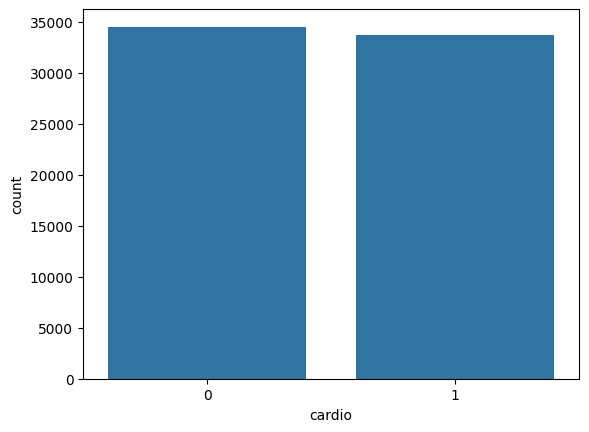

In [79]:
sns.countplot(data = df, x = 'cardio')

In [80]:
df['cardio'].value_counts()

cardio
0    34533
1    33672
Name: count, dtype: int64

In [81]:
df.isnull().sum()

gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
bmi            0
bp_category    0
dtype: int64

In [82]:
df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


In [83]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


In [84]:
# Numerical = []
# Categorical = []

# for col in df.columns:
#     if df[col].dtypes != 'O':
#         Numerical.append(col)
#     else:
#         Categorical.append(col)

In [85]:
# Numerical

In [86]:
# Categorical

In [87]:
Categorical =  ["gender", "cholesterol", "gluc",
                 "smoke", "alco", "active", "bp_category", 'cardio']

In [88]:
Numerical = [col for col in df.columns if col not in Categorical]
Numerical


['height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi']

In [89]:
# df.info()

In [90]:
df[Numerical
   ]

,height,weight,ap_hi,ap_lo,age_years,bmi
0,168,62.0,110,80,50,21.967120
1,156,85.0,140,90,55,34.927679
2,165,64.0,130,70,51,23.507805
3,169,82.0,150,100,48,28.710479
4,156,56.0,100,60,47,23.011177
...,...,...,...,...,...,...
68200,168,76.0,120,80,52,26.927438
68201,158,126.0,140,90,61,50.472681
68202,183,105.0,180,90,52,31.353579
68203,163,72.0,135,80,61,27.099251


In [91]:
corr = df[Numerical].corr()

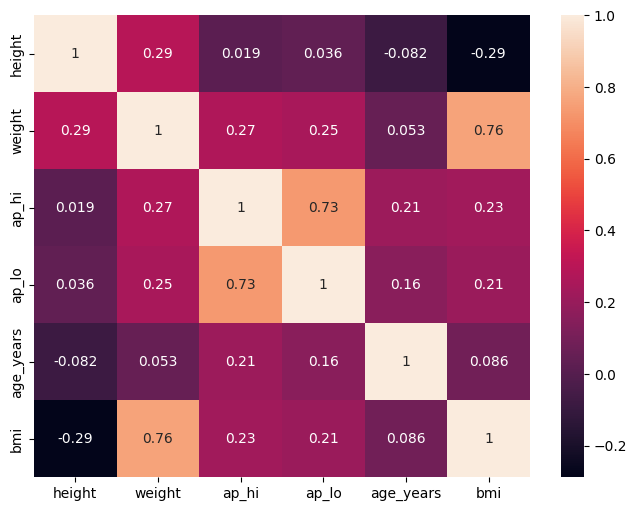

In [92]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot= True)

plt.savefig('Heatmap.png')

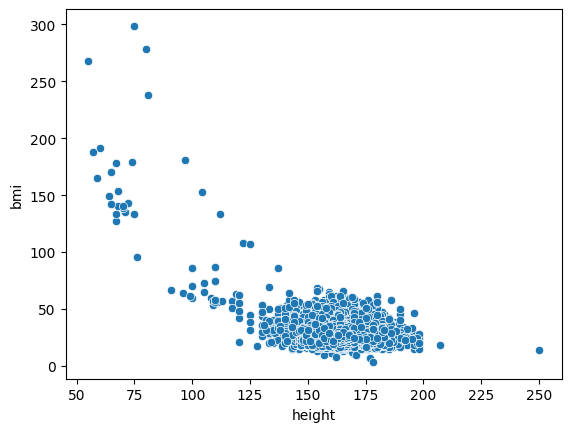

In [93]:
sns.scatterplot(df, x = 'height', y = 'bmi')
plt.savefig('weight vs heigh.png')

<Axes: xlabel='height', ylabel='weight'>

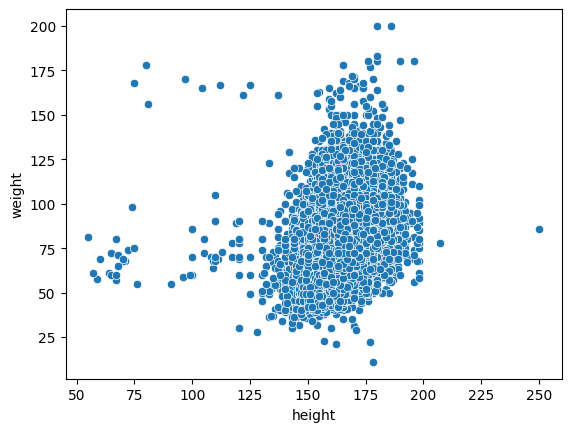

In [94]:
sns.scatterplot(df , x = 'height', y = 'weight')

In [95]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


<Axes: xlabel='height', ylabel='Density'>

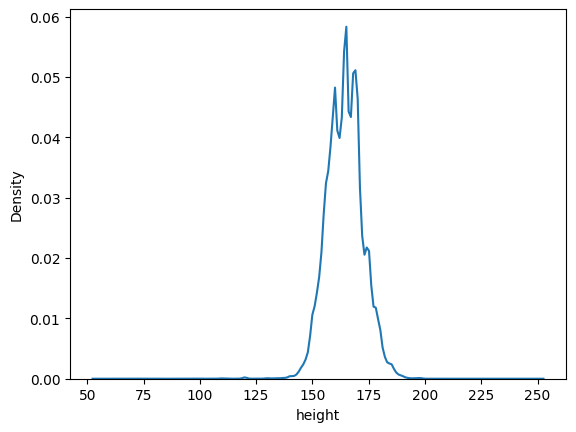

In [96]:
sns.kdeplot(df['height'])

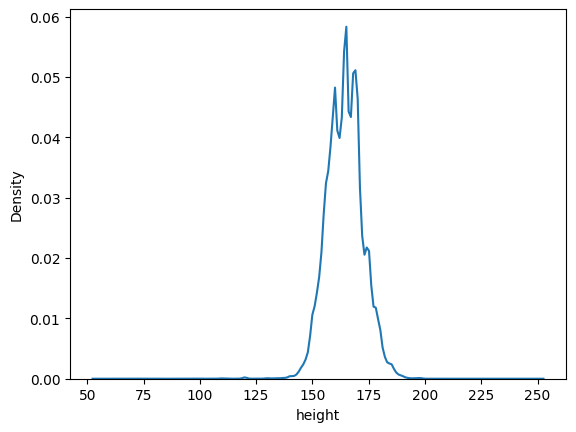

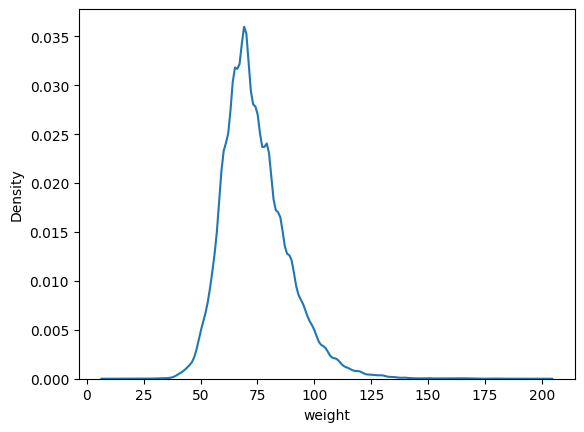

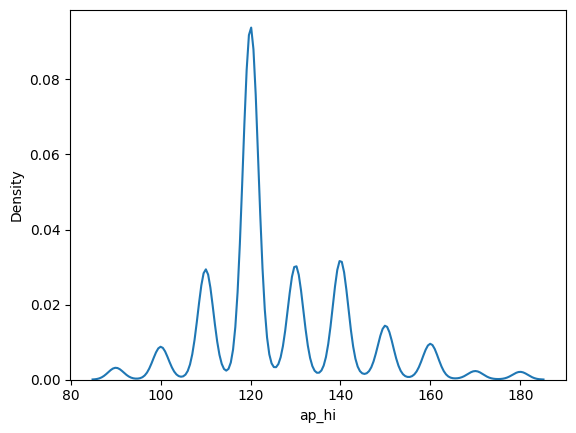

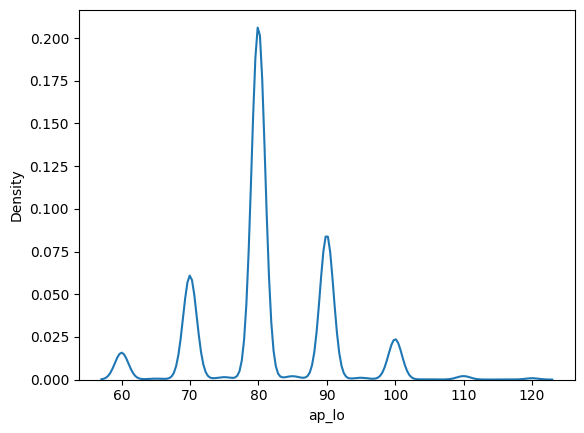

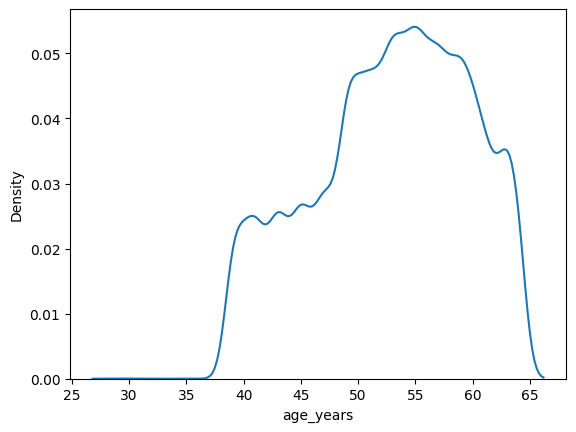

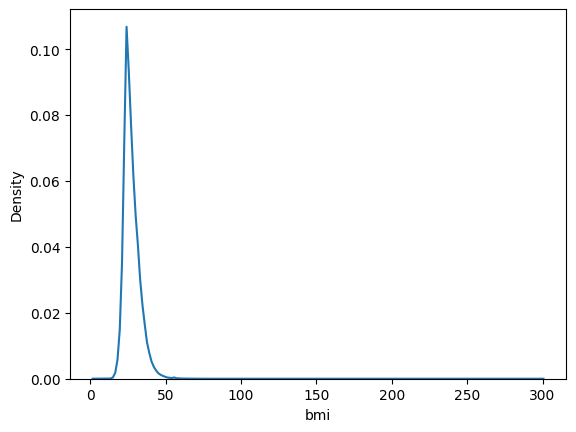

In [97]:
for col in Numerical:
    plt.figure()
    sns.kdeplot(df[col])

<Axes: ylabel='height'>

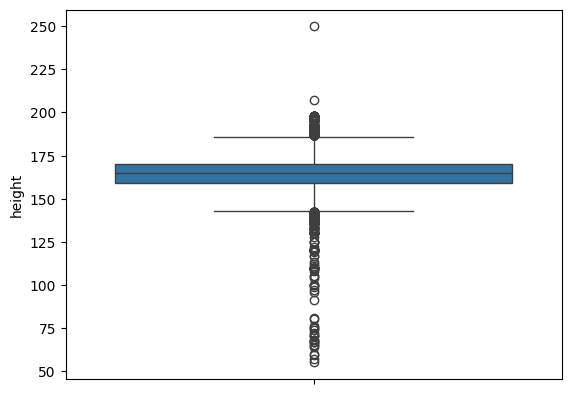

In [98]:
sns.boxplot(df['height'])

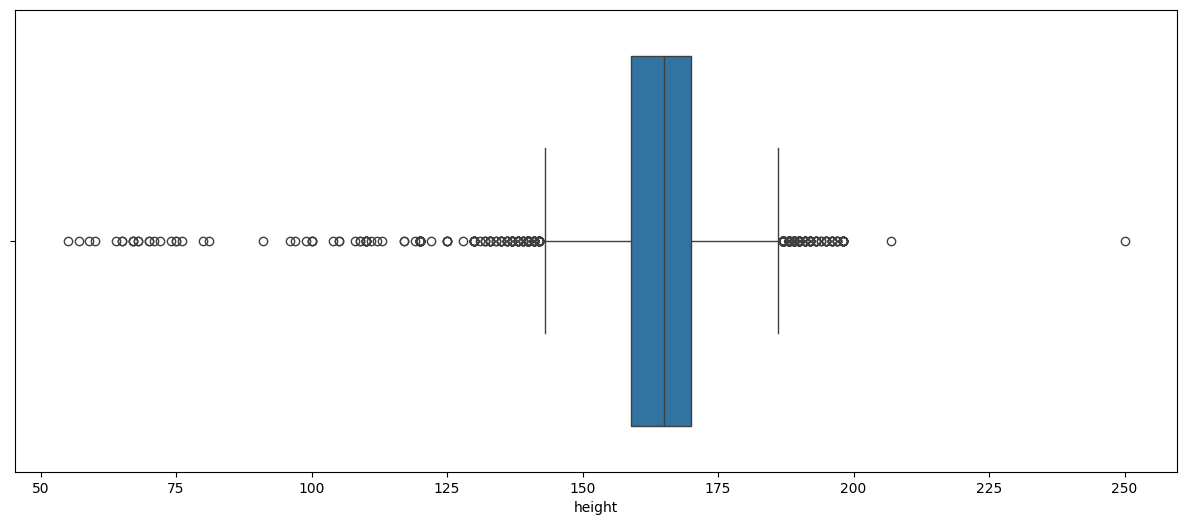

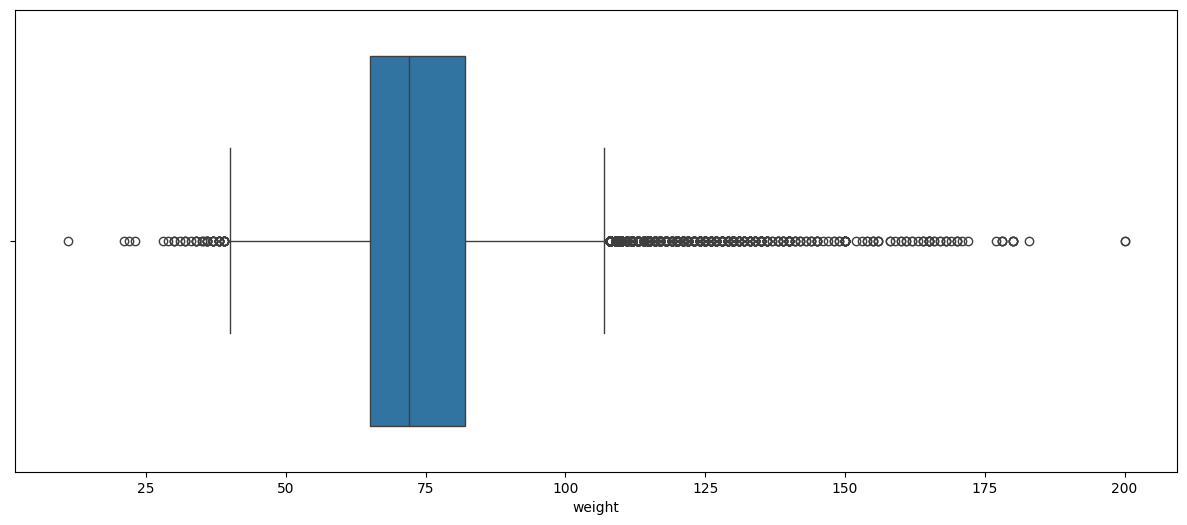

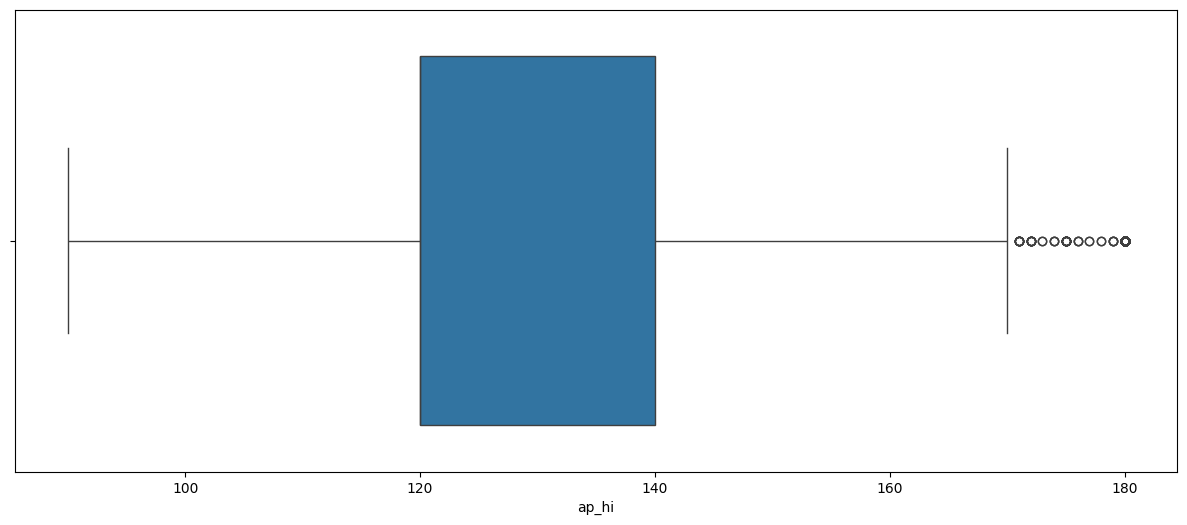

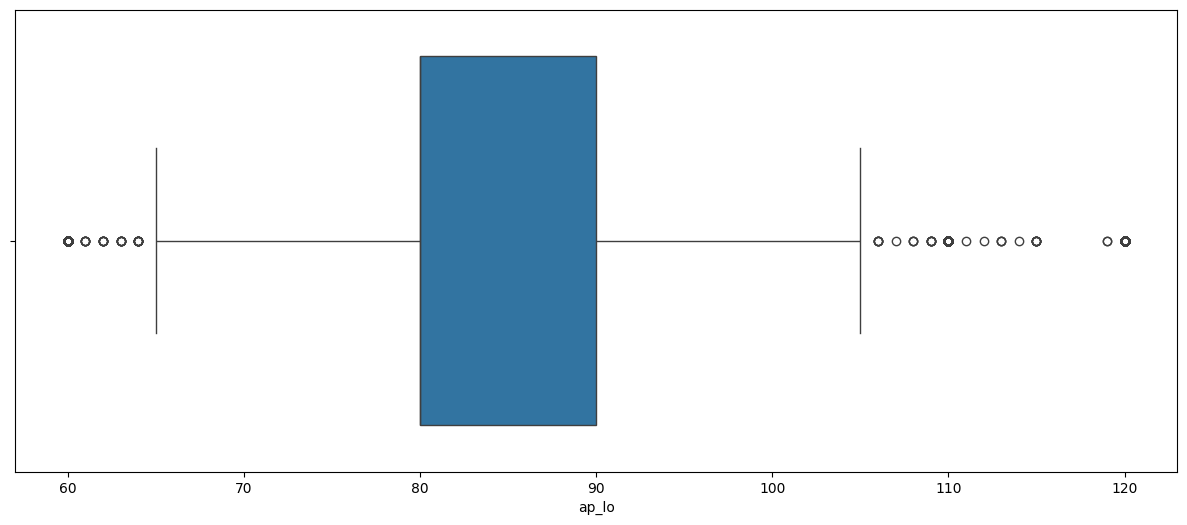

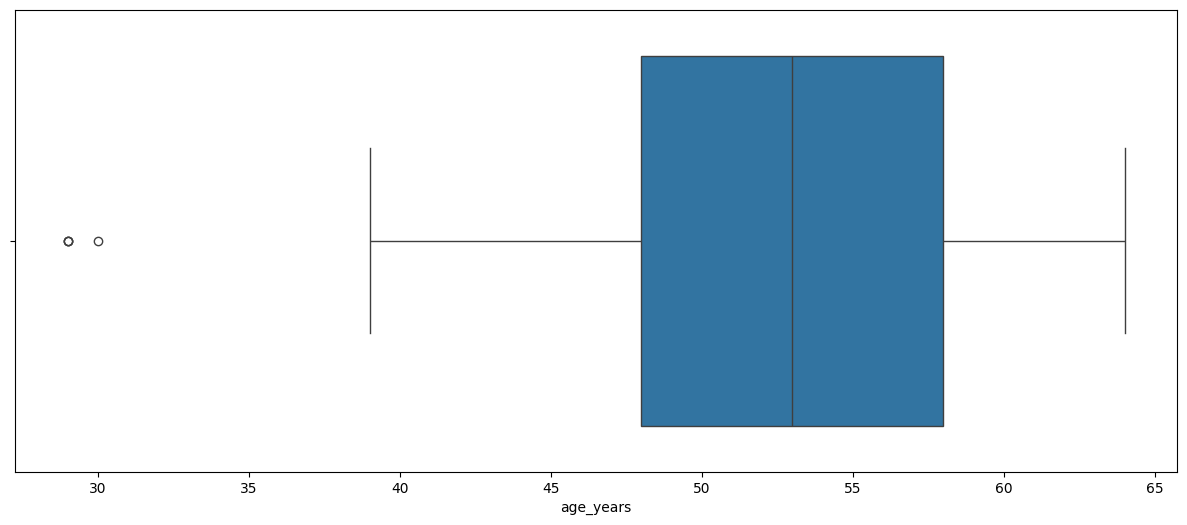

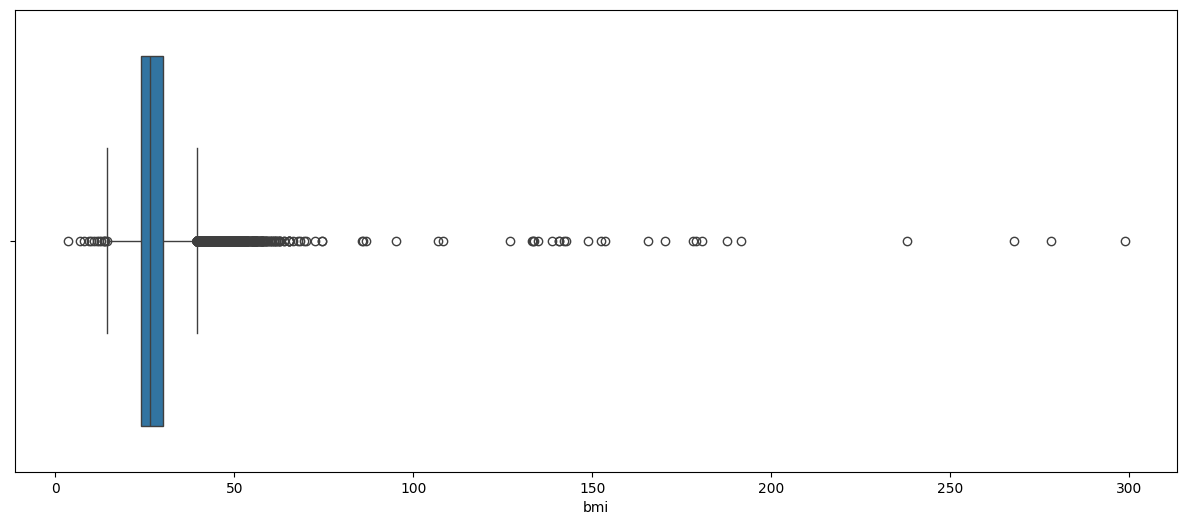

In [99]:
for col in Numerical:
    plt.figure(figsize= (15,6))
    sns.boxplot(df[col], orient= 'h')

In [100]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


In [101]:
# df.head()

In [102]:
df.shape

(68205, 14)

In [103]:
# Iqr , Boundary values , Percentile, yeojohnson : Box - cons

<Axes: ylabel='height'>

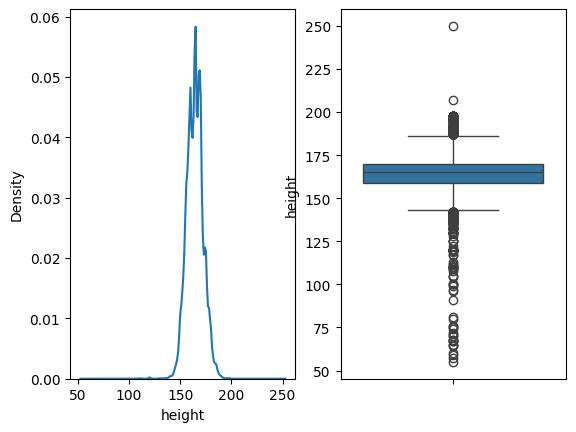

In [104]:
fig , ax = plt.subplots(1,2)

# plt.figure(figsize = (10,5))

sns.kdeplot(df['height'], ax = ax[0])
sns.boxplot(df['height'], ax = ax[1])

In [105]:
# log
df['height_log'] = np.log1p(df['height'])

In [106]:
df['height_sqr'] = np.sqrt(df['height'])

<Axes: ylabel='height_sqr'>

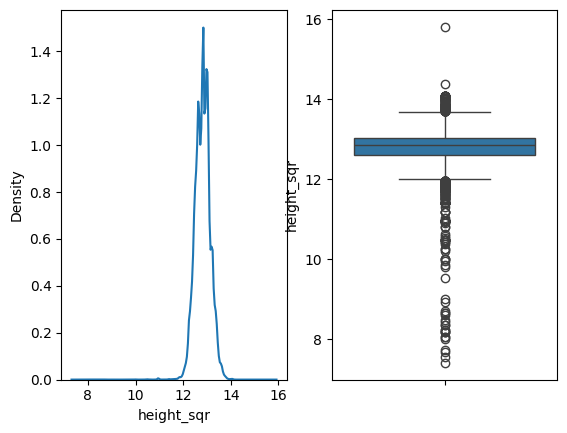

In [107]:
fig , ax = plt.subplots(1,2)

# plt.figure(figsize = (10,5))

sns.kdeplot(df['height_sqr'], ax = ax[0])
sns.boxplot(df['height_sqr'], ax = ax[1])

<Axes: ylabel='height_yj'>

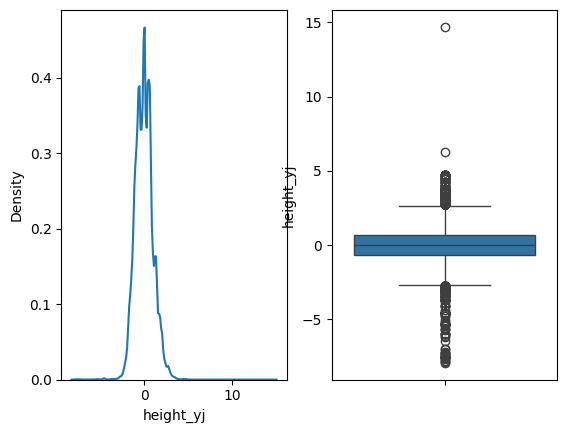

In [108]:
pt = PowerTransformer()

df['height_yj'] = pt.fit_transform(df[['height']])

fig , ax = plt.subplots(1,2)

# plt.figure(figsize = (10,5))

sns.kdeplot(df['height_yj'], ax = ax[0])
sns.boxplot(df['height_yj'], ax = ax[1])

In [109]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,height_log,height_sqr,height_yj
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,5.129899,12.961481,0.421536
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,5.056246,12.489996,-1.036468
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,5.111988,12.845233,0.042828
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,5.135798,13.000000,0.549899
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,5.056246,12.489996,-1.036468


In [110]:
Categorical

['gender',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'bp_category',
 'cardio']

In [111]:
Numerical


['height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi']

In [112]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,height_log,height_sqr,height_yj
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,5.129899,12.961481,0.421536
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,5.056246,12.489996,-1.036468
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,5.111988,12.845233,0.042828
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,5.135798,13.000000,0.549899
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,5.056246,12.489996,-1.036468


In [113]:
# df.iloc[:, -3:]

df.drop(df.iloc[:, -3:], axis = 1, inplace = True)

In [114]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


In [115]:
X = df.drop('cardio', axis = 1)
y = df['cardio']

In [116]:
X

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,47,23.011177,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,2,168,76.0,120,80,1,1,1,0,1,52,26.927438,Hypertension Stage 1
68201,1,158,126.0,140,90,2,2,0,0,1,61,50.472681,Hypertension Stage 2
68202,2,183,105.0,180,90,3,1,0,1,0,52,31.353579,Hypertension Stage 2
68203,1,163,72.0,135,80,1,2,0,0,0,61,27.099251,Hypertension Stage 1


In [117]:
X_train, x_test,y_train, y_test = train_test_split(X,y, train_size= 0.8)

In [118]:
Numerical

['height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi']

Scaling the Numerical Columns

In [119]:
X_train

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,bp_category
30026,1,167,73.0,130,90,1,1,0,0,1,59,26.175195,Hypertension Stage 1
64310,1,167,87.0,130,80,1,1,0,0,1,51,31.195095,Hypertension Stage 1
1641,2,170,76.0,120,80,1,1,0,0,1,59,26.297578,Hypertension Stage 1
6753,1,180,75.0,120,80,1,1,0,0,1,52,23.148148,Hypertension Stage 1
48059,1,160,86.0,150,90,1,1,0,0,1,61,33.593750,Hypertension Stage 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9134,1,172,65.0,110,70,1,1,0,0,1,41,21.971336,Normal
16084,2,178,70.0,140,90,1,1,0,0,1,57,22.093170,Hypertension Stage 2
12805,2,165,55.0,120,80,1,1,1,0,1,53,20.202020,Hypertension Stage 1
47920,1,156,49.0,110,70,2,1,0,0,1,63,20.134780,Normal


In [120]:
ct = ColumnTransformer(
    transformers=[
        ('rbs', RobustScaler(), Numerical),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), ['bp_category'])
    ],
    remainder='passthrough'
)


In [121]:
ct

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('rbs', ...), ('ohe', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``.

In [122]:
ct.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(remainder='passthrough',
                  transformers=[('rbs', RobustScaler(),
                                 ['height', 'weight', 'ap_hi', 'ap_lo',
                                  'age_years', 'bmi']),
                                ('ohe',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['bp_category'])])>

In [123]:
X_train.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'age_years', 'bmi', 'bp_category'],
      dtype='object')

In [124]:
ct.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(remainder='passthrough',
                  transformers=[('rbs', RobustScaler(),
                                 ['height', 'weight', 'ap_hi', 'ap_lo',
                                  'age_years', 'bmi']),
                                ('ohe',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['bp_category'])])>

In [125]:
X_train_transformed = ct.fit_transform(X_train)

In [126]:
X_train_transformed

array([[ 0.18181818,  0.05882353,  0.5       , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.18181818,  0.88235294,  0.5       , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.45454545,  0.23529412,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.        , -1.        ,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.81818182, -1.35294118, -0.5       , ...,  0.        ,
         0.        ,  1.        ],
       [-0.90909091, -0.05882353,  0.5       , ...,  0.        ,
         0.        ,  0.        ]], shape=(54564, 15))

In [127]:
x_test

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,bp_category
41505,1,160,60.0,140,90,1,1,0,0,1,61,23.437500,Hypertension Stage 2
30442,2,169,80.0,130,80,1,1,0,0,1,43,28.010224,Hypertension Stage 1
27522,2,175,80.0,120,79,1,1,0,0,0,52,26.122449,Elevated
25222,1,157,63.0,110,70,1,1,0,0,1,53,25.558846,Normal
21060,2,163,80.0,130,80,1,1,1,1,1,57,30.110279,Hypertension Stage 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48965,2,182,83.0,160,100,1,3,1,0,0,64,25.057360,Hypertension Stage 2
30454,2,175,85.0,180,90,2,1,0,0,1,43,27.755102,Hypertension Stage 2
63654,1,161,76.0,120,80,3,1,0,0,1,59,29.319856,Hypertension Stage 1
31063,1,169,65.0,120,80,1,1,0,0,1,49,22.758307,Hypertension Stage 1


In [128]:
pd.DataFrame(X_train_transformed, columns= ct.get_feature_names_out())

# pd.DataFrame()

,rbs__height,rbs__weight,rbs__ap_hi,rbs__ap_lo,rbs__age_years,rbs__bmi,ohe__bp_category_Hypertension Stage 1,ohe__bp_category_Hypertension Stage 2,ohe__bp_category_Normal,remainder__gender,remainder__cholesterol,remainder__gluc,remainder__smoke,remainder__alco,remainder__active
0,0.181818,0.058824,0.5,1.0,0.6,-0.022340,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
1,0.181818,0.882353,0.5,0.0,-0.2,0.781888,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
2,0.454545,0.235294,0.0,0.0,0.6,-0.002733,1.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0
3,1.363636,0.176471,0.0,0.0,-0.1,-0.507296,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
4,-0.454545,0.823529,1.5,1.0,0.8,1.166172,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54559,0.636364,-0.411765,-0.5,-1.0,-1.2,-0.695831,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
54560,1.181818,-0.117647,1.0,1.0,0.4,-0.676312,0.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0
54561,0.000000,-1.000000,0.0,0.0,0.0,-0.979289,1.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0
54562,-0.818182,-1.352941,-0.5,-1.0,1.0,-0.990062,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0


In [129]:
# new_df

In [130]:
# new_df.columns

In [131]:
X_test_transformed = ct.transform(x_test)

In [132]:
# X_train_transformed  >> ColumnTransformer >> Model

In [133]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


Model Training 

* Decision Tree Classifier
* Random Forest
* xgboost


Decision Tree

In [134]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train_transformed, y_train)
preds = dtc.predict(X_test_transformed)

In [135]:
acc = accuracy_score(preds, y_test)
rec = recall_score(preds, y_test)
pres = precision_score(preds, y_test)

In [136]:
print(acc)
print(rec)
print(pres)

0.6403489480243384
0.6386131052390408
0.6220800476119626


In [137]:
cm = confusion_matrix(preds, y_test)

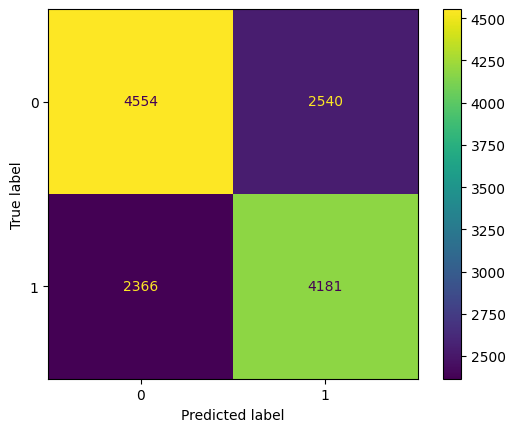

In [138]:
ConfusionMatrixDisplay(cm).plot()





In [139]:
# with params :

dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5)

dt.fit(X_train_transformed, y_train)
predicts = dt.predict(X_test_transformed)


In [140]:

acc = accuracy_score(predicts, y_test)
rec = recall_score(predicts, y_test)
pres = precision_score(predicts, y_test)


print(acc)
print(rec)
print(pres)

0.7335972436038414
0.7624553647338888
0.6671626246094331


In [142]:
cm = confusion_matrix(predicts, y_test)

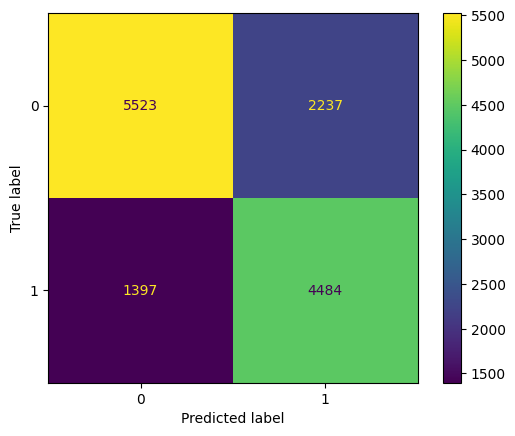

In [144]:
ConfusionMatrixDisplay(cm).plot()

In [145]:
from sklearn.model_selection import RandomizedSearchCV

In [147]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [224]:
params_dict = {'criterion': ['gini', 'entropy'],
 'max_depth': [14,8,15,6,19],
 'max_features': [6,7,10,21,9,5],
 'min_samples_split': [8,10,12,19],
 'max_features' : [3,2,4]
}

In [252]:
rc = RandomizedSearchCV(dtc , param_distributions=params_dict, cv = 25)
rc.fit(X_train_transformed, y_train)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeClassifier()
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'criterion': ['gini', 'entropy'], 'max_depth': [14, 8, ...], 'max_features': [3, 2, ...], 'min_samples_split': [8, 10, ...]}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",10
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchang

In [255]:

predsrc = rc.predict(X_test_transformed)

In [256]:
predsrc

array([1, 1, 0, ..., 1, 0, 1], shape=(13641,))

In [257]:
rc.best_params_

{'min_samples_split': 10,
 'max_features': 3,
 'max_depth': 8,
 'criterion': 'gini'}

In [258]:
acc = accuracy_score(predsrc, y_test)
rec = recall_score(predsrc, y_test)
pres = precision_score(predsrc, y_test)

In [259]:
print(acc)
print(rec)
print(pres)

0.7268528700241917
0.7428247121777202
0.6815950007439369


In [260]:
cm = confusion_matrix(predsrc, y_test)

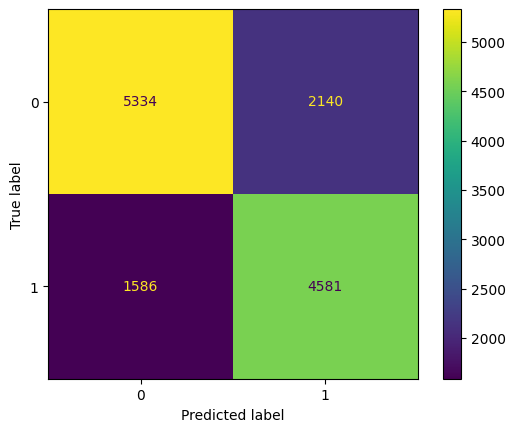

In [261]:
ConfusionMatrixDisplay(cm).plot()

In [234]:
best_dict = rc.best_estimator_

In [235]:
best_dict

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",12
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",4
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [236]:
best_dict.fit(X_train_transformed, y_train)
rc_predict = best_dict.predict(X_test_transformed)
acc = accuracy_score(rc_predict, y_test)
rec = recall_score(rc_predict, y_test)
pres = precision_score(rc_predict, y_test)

In [237]:
print(acc)
print(rec)
print(pres)

0.7281724213767319
0.7665899840736153
0.6445469424192829


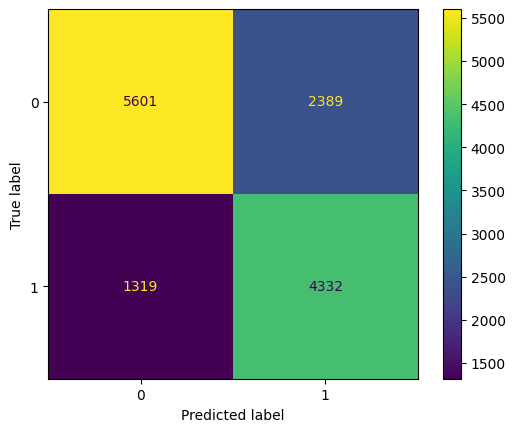

In [238]:
cm =  confusion_matrix(rc_predict, y_test)
ConfusionMatrixDisplay(cm).plot()

In [242]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train_transformed, y_train)
gbc_predict = gbc.predict(X_test_transformed)

acc = accuracy_score(gbc_predict, y_test)
rec = recall_score(gbc_predict, y_test)
pres = precision_score(gbc_predict, y_test)


In [244]:
print(acc)
print(rec)
print(pres)

0.7374092808445128
0.7576752585782301
0.6866537717601547


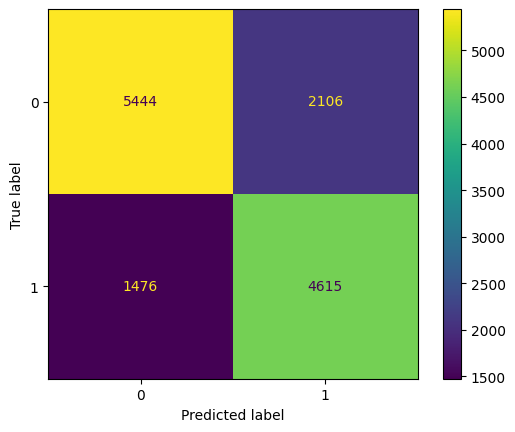

In [245]:
cm =  confusion_matrix(gbc_predict, y_test)
ConfusionMatrixDisplay(cm).plot()